In [29]:
import sys
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

In [30]:
wiki = pd.read_json('wikidata-movies.json.gz', orient='record', lines=True)
tomatoes = pd.read_json('rotten-tomatoes.json.gz', orient='record', lines=True)
omdb = pd.read_json('omdb-data.json.gz', orient='record', lines=True)

In [31]:
tomatoes.head()

,audience_average,audience_percent,audience_ratings,critic_average,critic_percent,imdb_id,rotten_tomatoes_id
0,3.9,86.0,33125227.0,7.1,79.0,tt0325980,m/pirates_of_the_caribbean_the_curse_of_the_bl...
1,4.1,80.0,2139.0,7.8,88.0,tt4882376,m/first_they_killed_my_father_a_daughter_of_ca...
2,3.6,71.0,11482.0,7.6,86.0,tt0099763,m/henry_portrait_of_a_serial_killer
3,3.6,66.0,187204.0,6.6,66.0,tt1371111,m/cloud_atlas_2012
4,3.9,84.0,26836.0,7.4,80.0,tt1189073,m/the_skin_i_live_in


In [32]:
wiki.head()

,based_on,cast_member,country_of_origin,director,enwiki_title,filming_location,genre,imdb_id,label,made_profit,main_subject,metacritic_id,original_language,publication_date,rotten_tomatoes_id,series,wikidata_id
0,NaN,"[Q228931, Q235384]",Q145,[Q43079418],If I Were You (2012 Canadian film),NaN,[Q859369],tt1587309,If I Were You,NaN,NaN,NaN,Q1860,2012-01-01,m/if_i_were_you_2012,NaN,Q43079072
1,NaN,NaN,Q30,NaN,Krampus: The Devil Returns,NaN,[Q28026639],tt3527772,Krampus: The Devil Returns,NaN,NaN,NaN,Q1860,2016-10-04,m/krampus_the_devil_returns,NaN,Q43302269
2,NaN,"[Q106303, Q467957, Q3345693, Q3340838, Q316419...",Q142,[Q724208],Le Brio,[Q50742],[Q157443],tt6462462,NaN,NaN,NaN,NaN,Q150,2017-01-01,m/le_brio,NaN,Q43400054
3,NaN,NaN,Q30,[Q4718041],A Christmas Prince,NaN,"[Q860626, Q28026639]",tt7608418,A Christmas Prince,NaN,NaN,NaN,Q1860,2017-11-17,m/a_christmas_prince,NaN,Q43401863
4,Q7162696,NaN,Q252,[Q11036795],Pengabdi Setan (2017 film),NaN,[Q200092],tt7076834,Pengabdi Setan,NaN,NaN,NaN,Q9240,2017-01-01,m/satans_slaves,NaN,Q41850450


### Join wiki and rotten_tomatoes on imdb_id

In [33]:
df = pd.merge(wiki, tomatoes, on='imdb_id', how='inner')

In [34]:
df.head()

,based_on,cast_member,country_of_origin,director,enwiki_title,filming_location,genre,imdb_id,label,made_profit,...,publication_date,rotten_tomatoes_id_x,series,wikidata_id,audience_average,audience_percent,audience_ratings,critic_average,critic_percent,rotten_tomatoes_id_y
0,NaN,"[Q228931, Q235384]",Q145,[Q43079418],If I Were You (2012 Canadian film),NaN,[Q859369],tt1587309,If I Were You,NaN,...,2012-01-01,m/if_i_were_you_2012,NaN,Q43079072,3.9,72.0,244.0,3.7,9.0,m/if_i_were_you_2012
1,NaN,NaN,Q30,NaN,Krampus: The Devil Returns,NaN,[Q28026639],tt3527772,Krampus: The Devil Returns,NaN,...,2016-10-04,m/krampus_the_devil_returns,NaN,Q43302269,1.8,24.0,31.0,NaN,NaN,m/krampus_the_devil_returns
2,NaN,"[Q106303, Q467957, Q3345693, Q3340838, Q316419...",Q142,[Q724208],Le Brio,[Q50742],[Q157443],tt6462462,NaN,NaN,...,2017-01-01,m/le_brio,NaN,Q43400054,3.4,67.0,13.0,6.7,80.0,m/le_brio
3,NaN,NaN,Q30,[Q4718041],A Christmas Prince,NaN,"[Q860626, Q28026639]",tt7608418,A Christmas Prince,NaN,...,2017-11-17,m/a_christmas_prince,NaN,Q43401863,3.2,48.0,198.0,6.5,83.0,m/a_christmas_prince
4,Q7162696,NaN,Q252,[Q11036795],Pengabdi Setan (2017 film),NaN,[Q200092],tt7076834,Pengabdi Setan,NaN,...,2017-01-01,m/satans_slaves,NaN,Q41850450,4.0,77.0,39.0,NaN,NaN,m/satans_slaves


In [35]:
df = df[['label','imdb_id','cast_member','director','filming_location','based_on','country_of_origin','original_language','main_subject','publication_date','series','made_profit','audience_average','audience_percent','audience_ratings','critic_average','critic_percent']]

### Only select the movies that having audience_ratings greater than 3000 to make sure the audience and critic averages are credible

In [36]:
df2 = df[df['audience_ratings'] > 3000]

In [37]:
df2.head()

,label,imdb_id,cast_member,director,filming_location,based_on,country_of_origin,original_language,main_subject,publication_date,series,made_profit,audience_average,audience_percent,audience_ratings,critic_average,critic_percent
60,Iris,tt4157220,NaN,[Q15782045],NaN,NaN,Q30,Q1860,[Q2112549],2014-01-01,NaN,NaN,3.9,80.0,6276.0,7.5,98.0
61,We Live in Public,tt0498329,[Q6288962],[Q7092172],NaN,NaN,Q30,Q1860,"[Q75, Q188728]",2009-01-19,NaN,NaN,3.7,78.0,13302.0,7.1,81.0
63,A Fantastic Fear of Everything,tt2006040,"[Q238464, Q274616, Q454790, Q1378684]","[Q5106916, Q711920]",NaN,NaN,Q145,Q1860,NaN,2012-01-01,NaN,NaN,2.9,35.0,4653.0,4.2,31.0
66,Delirious,tt0412637,"[Q104061, Q352540, Q4518, Q229325, Q206939, Q1...",[Q784641],[Q60],NaN,Q30,Q1860,NaN,2006-09-26,NaN,NaN,3.2,57.0,8456.0,6.8,82.0
67,Four Lions,tt1341167,"[Q1861917, Q6380733, Q7032521, Q4681497, Q2446...",[Q552780],NaN,NaN,Q142,Q1860,[Q7283],2010-01-01,NaN,NaN,3.8,79.0,23257.0,7.3,82.0


### Divide the original languages into 2 categories, English and others.

In [38]:
df2.dropna(subset=['critic_average', 'critic_percent'])
eng = df2['original_language'].iloc[0]
df2.loc[df2['original_language'] == eng, "original_language",]='english'
df2.loc[df2['original_language'] != "english", "original_language",]='others'
df2

/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,label,imdb_id,cast_member,director,filming_location,based_on,country_of_origin,original_language,main_subject,publication_date,series,made_profit,audience_average,audience_percent,audience_ratings,critic_average,critic_percent
60,Iris,tt4157220,NaN,[Q15782045],NaN,NaN,Q30,english,[Q2112549],2014-01-01,NaN,NaN,3.9,80.0,6276.0,7.5,98.0
61,We Live in Public,tt0498329,[Q6288962],[Q7092172],NaN,NaN,Q30,english,"[Q75, Q188728]",2009-01-19,NaN,NaN,3.7,78.0,13302.0,7.1,81.0
63,A Fantastic Fear of Everything,tt2006040,"[Q238464, Q274616, Q454790, Q1378684]","[Q5106916, Q711920]",NaN,NaN,Q145,english,NaN,2012-01-01,NaN,NaN,2.9,35.0,4653.0,4.2,31.0
66,Delirious,tt0412637,"[Q104061, Q352540, Q4518, Q229325, Q206939, Q1...",[Q784641],[Q60],NaN,Q30,english,NaN,2006-09-26,NaN,NaN,3.2,57.0,8456.0,6.8,82.0
67,Four Lions,tt1341167,"[Q1861917, Q6380733, Q7032521, Q4681497, Q2446...",[Q552780],NaN,NaN,Q142,english,[Q7283],2010-01-01,NaN,NaN,3.8,79.0,23257.0,7.3,82.0
68,Eraserhead,tt0074486,"[Q386349, Q1605965, Q3805579, Q271162, Q463226...",[Q2071],[Q99],NaN,Q30,english,[Q906343],1977-01-01,NaN,1.0,3.9,83.0,57175.0,8.3,91.0
69,And Now for Something Completely Different,tt0066765,"[Q24962, Q25014, Q25078, Q210741, Q166159, Q22...",[Q710041],NaN,NaN,Q145,english,[Q362],1971-01-01,NaN,NaN,3.8,87.0,63485.0,6.9,90.0
71,Roma,tt0069191,"[Q3723144, Q3757797, Q1118450, Q82692, Q137747...",[Q7371],[Q220],NaN,Q142,others,NaN,1972-01-01,NaN,NaN,3.9,82.0,6233.0,6.6,64.0
73,Tron: Legacy,tt1104001,"[Q174843, Q298371, Q200355, Q356156, Q298276, ...",[Q2444076],[Q24639],Q95074,Q30,english,"[Q179310, Q544830]",2010-12-16,NaN,NaN,3.5,63.0,171134.0,5.8,51.0
75,The Magnificent Seven,tt0054047,"[Q102813, Q104067, Q159347, Q4227, Q314834, Q3...",[Q361670],[Q96],Q189540,Q30,english,NaN,1960-01-01,NaN,NaN,3.8,87.0,53878.0,8.0,90.0


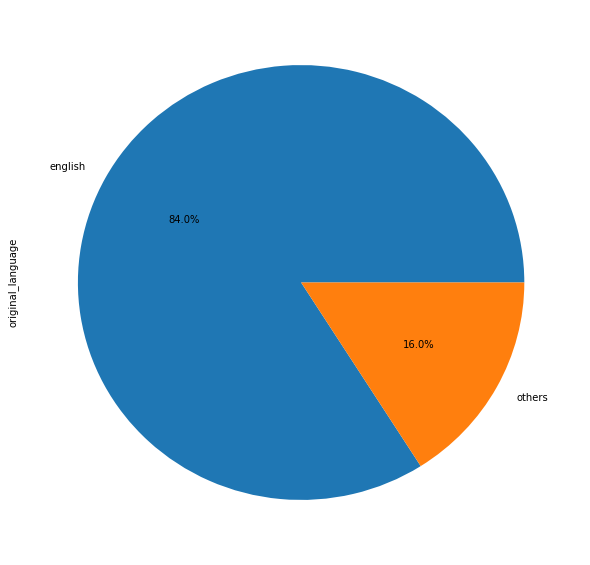

In [39]:
lst= pd.Series(df2['original_language'])
plt.figure(figsize=(10,10))
lst.value_counts().plot(kind='pie', autopct='%1.1f%%')

### Divide the countries of origin into 2 categories, USA and others.

In [40]:
usa = df2['country_of_origin'].iloc[0]
df2.loc[df2['country_of_origin'] == usa, "country_of_origin",]='USA'
df2.loc[df2['country_of_origin'] != "USA", "country_of_origin",]='others'

/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [41]:
df2.head()

,label,imdb_id,cast_member,director,filming_location,based_on,country_of_origin,original_language,main_subject,publication_date,series,made_profit,audience_average,audience_percent,audience_ratings,critic_average,critic_percent
60,Iris,tt4157220,NaN,[Q15782045],NaN,NaN,USA,english,[Q2112549],2014-01-01,NaN,NaN,3.9,80.0,6276.0,7.5,98.0
61,We Live in Public,tt0498329,[Q6288962],[Q7092172],NaN,NaN,USA,english,"[Q75, Q188728]",2009-01-19,NaN,NaN,3.7,78.0,13302.0,7.1,81.0
63,A Fantastic Fear of Everything,tt2006040,"[Q238464, Q274616, Q454790, Q1378684]","[Q5106916, Q711920]",NaN,NaN,others,english,NaN,2012-01-01,NaN,NaN,2.9,35.0,4653.0,4.2,31.0
66,Delirious,tt0412637,"[Q104061, Q352540, Q4518, Q229325, Q206939, Q1...",[Q784641],[Q60],NaN,USA,english,NaN,2006-09-26,NaN,NaN,3.2,57.0,8456.0,6.8,82.0
67,Four Lions,tt1341167,"[Q1861917, Q6380733, Q7032521, Q4681497, Q2446...",[Q552780],NaN,NaN,others,english,[Q7283],2010-01-01,NaN,NaN,3.8,79.0,23257.0,7.3,82.0


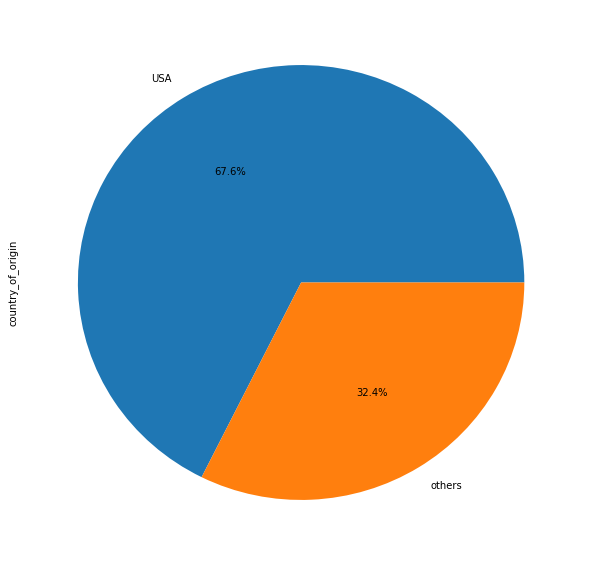

In [42]:
lst2 = pd.Series(df2['country_of_origin'])
plt.figure(figsize=(10,10))
lst2.value_counts().plot(kind='pie', autopct='%1.1f%%')

### Define success

In [43]:
df2['overall'] = (df2['audience_average']/5.0)*30 + (df2['audience_percent']/100)*10 + (df2['critic_average']/10.0)*40 + (df2['critic_percent']/100)*20

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [44]:
df2.head()

,label,imdb_id,cast_member,director,filming_location,based_on,country_of_origin,original_language,main_subject,publication_date,series,made_profit,audience_average,audience_percent,audience_ratings,critic_average,critic_percent,overall
60,Iris,tt4157220,NaN,[Q15782045],NaN,NaN,USA,english,[Q2112549],2014-01-01,NaN,NaN,3.9,80.0,6276.0,7.5,98.0,81.0
61,We Live in Public,tt0498329,[Q6288962],[Q7092172],NaN,NaN,USA,english,"[Q75, Q188728]",2009-01-19,NaN,NaN,3.7,78.0,13302.0,7.1,81.0,74.6
63,A Fantastic Fear of Everything,tt2006040,"[Q238464, Q274616, Q454790, Q1378684]","[Q5106916, Q711920]",NaN,NaN,others,english,NaN,2012-01-01,NaN,NaN,2.9,35.0,4653.0,4.2,31.0,43.9
66,Delirious,tt0412637,"[Q104061, Q352540, Q4518, Q229325, Q206939, Q1...",[Q784641],[Q60],NaN,USA,english,NaN,2006-09-26,NaN,NaN,3.2,57.0,8456.0,6.8,82.0,68.5
67,Four Lions,tt1341167,"[Q1861917, Q6380733, Q7032521, Q4681497, Q2446...",[Q552780],NaN,NaN,others,english,[Q7283],2010-01-01,NaN,NaN,3.8,79.0,23257.0,7.3,82.0,76.3


In [45]:
df2.loc[df2['overall'] >= 80, "success",]= 1
df2.loc[df2['overall'] < 80, "success",]= 0

/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:357: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


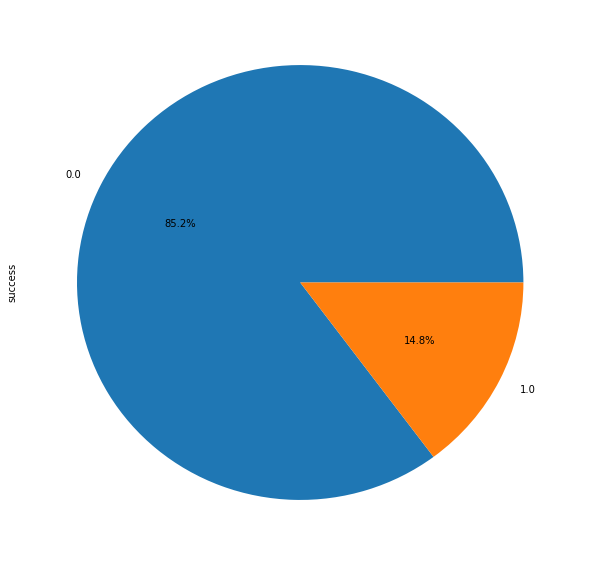

In [46]:
lst3 = pd.Series(df2['success'])
plt.figure(figsize=(10,10))
lst3.value_counts().plot(kind='pie', autopct='%1.1f%%')

### See if the movie is based on sth or series.

In [47]:
df2['based_on'] = df2['based_on'].fillna(0)
df2['series'] = df2['series'].fillna(0)
df2.loc[df2['based_on'] != 0, "based_on",]= 1
df2.loc[df2['series'] != 0, "series",]= 1

df2.dropna(subset=['cast_member', 'director'], inplace=True)
df2.dropna(subset=['cast_member', 'director'], inplace=True)
df2

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.o

,label,imdb_id,cast_member,director,filming_location,based_on,country_of_origin,original_language,main_subject,publication_date,series,made_profit,audience_average,audience_percent,audience_ratings,critic_average,critic_percent,overall,success
61,We Live in Public,tt0498329,[Q6288962],[Q7092172],NaN,0,USA,english,"[Q75, Q188728]",2009-01-19,0,NaN,3.7,78.0,13302.0,7.1,81.0,74.6,0.0
63,A Fantastic Fear of Everything,tt2006040,"[Q238464, Q274616, Q454790, Q1378684]","[Q5106916, Q711920]",NaN,0,others,english,NaN,2012-01-01,0,NaN,2.9,35.0,4653.0,4.2,31.0,43.9,0.0
66,Delirious,tt0412637,"[Q104061, Q352540, Q4518, Q229325, Q206939, Q1...",[Q784641],[Q60],0,USA,english,NaN,2006-09-26,0,NaN,3.2,57.0,8456.0,6.8,82.0,68.5,0.0
67,Four Lions,tt1341167,"[Q1861917, Q6380733, Q7032521, Q4681497, Q2446...",[Q552780],NaN,0,others,english,[Q7283],2010-01-01,0,NaN,3.8,79.0,23257.0,7.3,82.0,76.3,0.0
68,Eraserhead,tt0074486,"[Q386349, Q1605965, Q3805579, Q271162, Q463226...",[Q2071],[Q99],0,USA,english,[Q906343],1977-01-01,0,1.0,3.9,83.0,57175.0,8.3,91.0,83.1,1.0
69,And Now for Something Completely Different,tt0066765,"[Q24962, Q25014, Q25078, Q210741, Q166159, Q22...",[Q710041],NaN,0,others,english,[Q362],1971-01-01,0,NaN,3.8,87.0,63485.0,6.9,90.0,77.1,0.0
71,Roma,tt0069191,"[Q3723144, Q3757797, Q1118450, Q82692, Q137747...",[Q7371],[Q220],0,others,others,NaN,1972-01-01,0,NaN,3.9,82.0,6233.0,6.6,64.0,70.8,0.0
73,Tron: Legacy,tt1104001,"[Q174843, Q298371, Q200355, Q356156, Q298276, ...",[Q2444076],[Q24639],1,USA,english,"[Q179310, Q544830]",2010-12-16,0,NaN,3.5,63.0,171134.0,5.8,51.0,60.7,0.0
75,The Magnificent Seven,tt0054047,"[Q102813, Q104067, Q159347, Q4227, Q314834, Q3...",[Q361670],[Q96],1,USA,english,NaN,1960-01-01,0,NaN,3.8,87.0,53878.0,8.0,90.0,81.5,1.0
76,Dances with Wolves,tt0099348,"[Q117500, Q1376880, Q11930, Q311169, Q951634, ...",[Q11930],[Q1558],1,USA,english,NaN,1990-11-09,0,1.0,3.6,87.0,213360.0,7.5,82.0,76.7,0.0


In [48]:
directors = df2['director'].apply(pd.Series)
directors = directors.iloc[:,0]

### Find the most productive directors

In [49]:
# directors = directors.dropna()
directors.value_counts() #woody allen

Q25089       46
Q7374        37
Q43203       34
Q8877        31
Q41148       27
Q56005       25
Q103646      24
Q103917      22
Q295207      21
Q269692      21
Q189526      21
Q51566       21
Q350422      20
Q44131       19
Q51552       19
Q51547       18
Q223992      18
Q56094       18
Q309214      18
Q51559       17
Q315087      17
Q179497      17
Q55171       17
Q55422       17
Q55258       17
Q262130      17
Q51581       16
Q287607      16
Q316051      16
Q56008       16
             ..
Q3018825      1
Q235032       1
Q724516       1
Q55400        1
Q4275637      1
Q23901310     1
Q203804       1
Q223117       1
Q3992157      1
Q342636       1
Q5264772      1
Q1668336      1
Q15148968     1
Q17332507     1
Q182642       1
Q3568469      1
Q940924       1
Q24635079     1
Q17308798     1
Q1370923      1
Q421471       1
Q1937093      1
Q2647222      1
Q1052320      1
Q232941       1
Q580408       1
Q6968702      1
Q4811169      1
Q179463       1
Q4861608      1
Name: 0, Length: 3759, d

In [50]:
df2['director'] = directors
df2['director'].dtypes

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


dtype('O')

In [51]:
df2.loc[(df2['director'] == 'Q25089'), "woody_allen",]=1
df2.loc[(df2['director'] != 'Q25089'), "woody_allen",]=0

/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:357: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [52]:
data = df2[['based_on', 'country_of_origin', 'original_language', 'publication_date', 'series', 'success', 'woody_allen']]
data.loc[data['original_language'] == 'english', "English",]= 1
data.loc[data['original_language'] == 'others', "English",]= 0
data.loc[data['country_of_origin'] == 'USA', "America",]= 1
data.loc[data['country_of_origin'] == 'others', "America",]= 0
data = data.dropna()
data['publication_date'] = pd.to_datetime(data['publication_date'])
data['year'] = data['publication_date'].dt.year
data['month'] = data['publication_date'].dt.month

data

/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:357: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,based_on,country_of_origin,original_language,publication_date,series,success,woody_allen,English,America,year,month
61,0,USA,english,2009-01-19,0,0.0,0.0,1.0,1.0,2009,1
63,0,others,english,2012-01-01,0,0.0,0.0,1.0,0.0,2012,1
66,0,USA,english,2006-09-26,0,0.0,0.0,1.0,1.0,2006,9
67,0,others,english,2010-01-01,0,0.0,0.0,1.0,0.0,2010,1
68,0,USA,english,1977-01-01,0,1.0,0.0,1.0,1.0,1977,1
69,0,others,english,1971-01-01,0,0.0,0.0,1.0,0.0,1971,1
71,0,others,others,1972-01-01,0,0.0,0.0,0.0,0.0,1972,1
73,1,USA,english,2010-12-16,0,0.0,0.0,1.0,1.0,2010,12
75,1,USA,english,1960-01-01,0,1.0,0.0,1.0,1.0,1960,1
76,1,USA,english,1990-11-09,0,0.0,0.0,1.0,1.0,1990,11


### Machine Learning with random forest classifer

In [53]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

train_data_x = data[['based_on', 'series', 'English', 'America', 'year', 'month', 'woody_allen']]
train_data_y = data['success']

X_train, X_test, y_train, y_test = train_test_split(train_data_x, train_data_y)

rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.8451809856083733

### Feature Ranking

In [54]:
importances = rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X_train.shape[1]):
    print("%d. %s (%f)" % (f + 1, X_train.columns[f], importances[indices[f]]))

Feature ranking:
1. based_on (0.696657)
2. series (0.145640)
3. English (0.068839)
4. America (0.034368)
5. year (0.026564)
6. month (0.020135)
7. woody_allen (0.007797)


In [55]:
X_train.columns

Index(['based_on', 'series', 'English', 'America', 'year', 'month',
       'woody_allen'],
      dtype='object')

In [56]:
importances[indices]

array([0.69665663, 0.14564046, 0.06883855, 0.03436776, 0.02656368,
       0.02013546, 0.00779746])

Text(0.5,0,'Features')

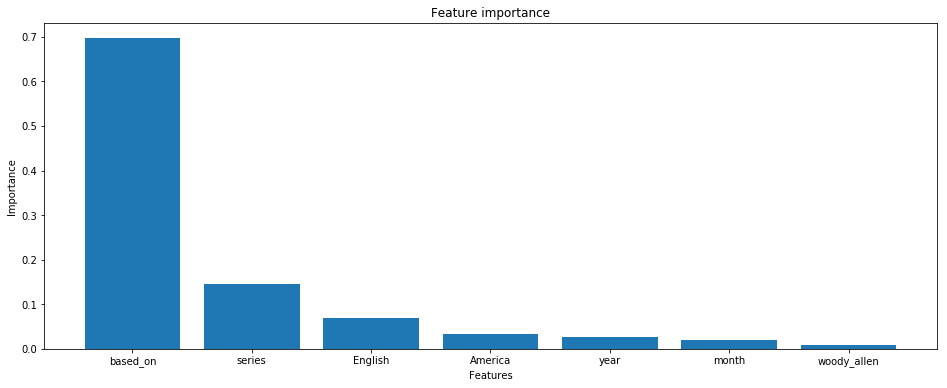

In [57]:
plt.figure(figsize=(16, 6))
plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), X_train.columns)
plt.title('Feature importance')
plt.ylabel('Importance')
plt.xlabel('Features')